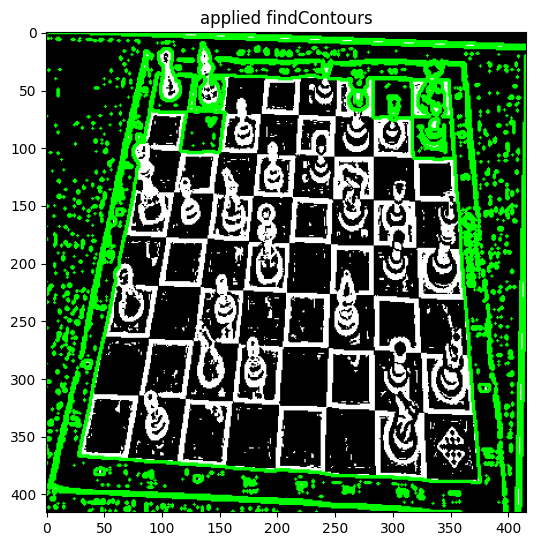

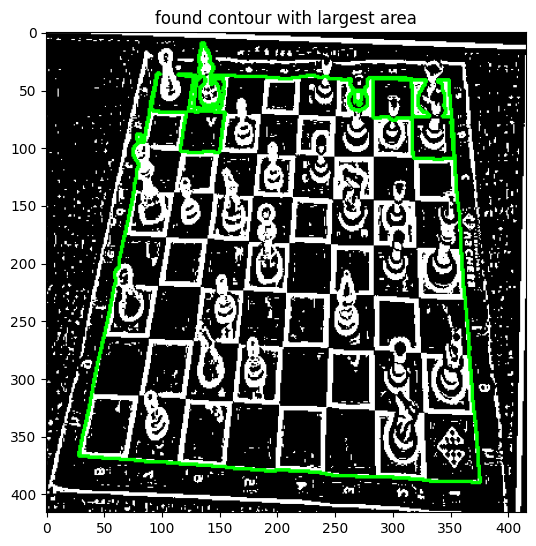

[[ 28. 367.]
 [376. 390.]
 [ 96.  35.]
 [349.  41.]]


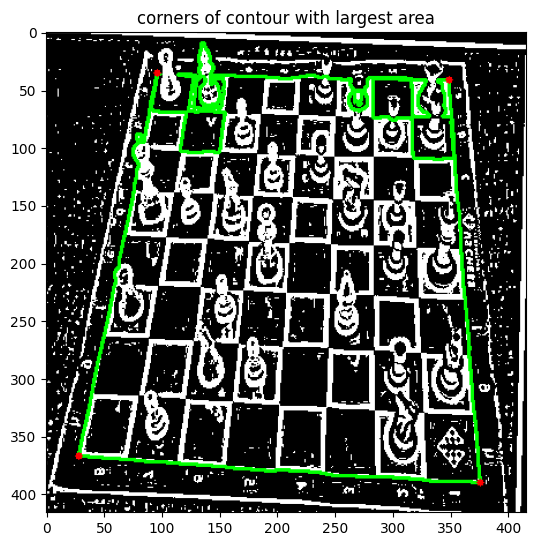

c:\Users\LCX\.conda\envs\yolo\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 36879 (\N{CJK UNIFIED IDEOGRAPH-900F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\LCX\.conda\envs\yolo\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 35270 (\N{CJK UNIFIED IDEOGRAPH-89C6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\LCX\.conda\envs\yolo\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21464 (\N{CJK UNIFIED IDEOGRAPH-53D8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\LCX\.conda\envs\yolo\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25442 (\N{CJK UNIFIED IDEOGRAPH-6362}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\LCX\.conda\envs\yolo\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21518 (\N{CJK UNIFIED IDEOGRAPH-540E}) missin

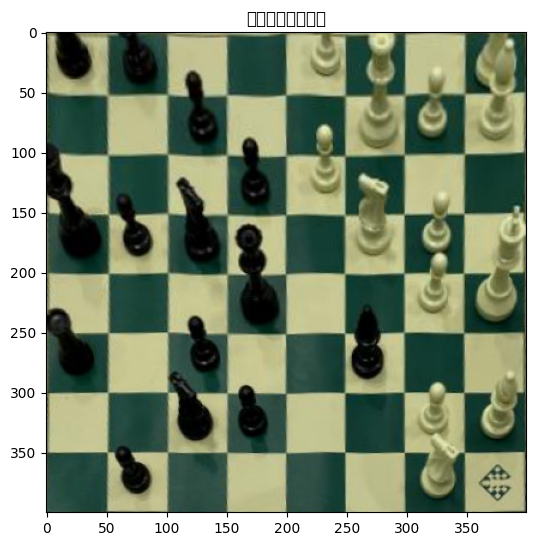

In [1]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
# 读取图像并转换为灰度图
image = cv2.imread(r'board.jpg')
def distance(p1, p2):
    return math.sqrt( ((p1[0]-p2[0])**2)+((p1[1]-p2[1])**2) )
def find_max_contour_area(contours):

    max_area = 0 - float('inf')
    max_c = None

    for c in contours:
        area = cv2.contourArea(c)

        if area > max_area:
            max_area = area
            max_c = c

    return [max_c]
def find_outer_corners(img, pts):

    rows, cols, _ = img.shape

    bl_dst = br_dst = tl_dst = tr_dst = float('inf')

    for p in pts:

        p = p[0]

        if distance(p, (cols*0, rows*1)) < bl_dst:
            bl_dst = distance(p, (cols*0, rows*1))
            bl = p

        if distance(p, (cols*1, rows*1)) < br_dst:
            br_dst = distance(p, (cols*1, rows*1))
            br = p

        if distance(p, (cols*0, rows*0)) < tl_dst:
            tl_dst = distance(p, (cols*0, rows*0))
            tl = p

        if distance(p, (cols*1, rows*0)) < tr_dst:
            tr_dst = distance(p, (cols*1, rows*0))
            tr = p

    pts1 = np.float32(
        [bl,  # btm left
        br,  # btm right
        tl,  # top left
        tr]  # top right
    )

    return pts1
axes = [0,0,1,1]
img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                            cv2.THRESH_BINARY_INV, 9, 3)


contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

ctrs1 = img.copy()
ctrs1 = cv2.drawContours(ctrs1, contours, -1, (0, 255, 0), 2).copy()

fig = plt.figure()
ax = fig.add_axes(axes)
ax.imshow(ctrs1)
plt.title('applied findContours')
plt.show()

contours = find_max_contour_area(contours)
 
img = cv2.drawContours(img, contours, -1, (0, 255, 0), 2).copy()

fig = plt.figure()
ax = fig.add_axes(axes)
ax.imshow(img)
plt.title('found contour with largest area')
plt.show()

c = contours[0]
peri = cv2.arcLength(c, True)
approx = cv2.approxPolyDP(c, 0.02 * peri, True)
pts = find_outer_corners(img, approx)
print(pts)
for p in pts:
    cv2.circle(img, (int(p[0]), int(p[1])), 3, (255, 0, 0), -1)

fig = plt.figure()
ax = fig.add_axes(axes)
ax.imshow(img)
plt.title('corners of contour with largest area')
plt.show()



# 定义目标图像的四个角点（宽400，高300）
# 顺序需与pts1（bl, br, tl, tr）严格对应：[底部左, 底部右, 顶部左, 顶部右]
W, H = 400, 400  # 目标图像尺寸（可根据实际调整）
pts2 = np.float32([
    [0, H],        # 底部左（对应原始bl）
    [W, H],        # 底部右（对应原始br）
    [0, 0],        # 顶部左（对应原始tl）
    [W, 0]         # 顶部右（对应原始tr）
])

# 计算透视变换矩阵
M = cv2.getPerspectiveTransform(pts, pts2)

# 应用透视变换（输入原始图像，输出目标尺寸的矩形）
warped_board = cv2.warpPerspective(image, M, (W, H))

# 显示变换后的棋盘（注意OpenCV用BGR格式，plt需要转RGB）
fig = plt.figure()
ax = fig.add_axes(axes)
ax.imshow(cv2.cvtColor(warped_board, cv2.COLOR_BGR2RGB))
plt.title('透视变换后的棋盘')
plt.show()